In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

In [2]:
#Load Data From CSV
telco = pd.read_csv('C://Users/mkrijal/Desktop/ML_Assignment/Telco-Customer-Churn.csv')
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#Create new dataframe
Custstat = telco[['tenure','MonthlyCharges','Churn']]
Custstat.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,No
1,34,56.95,No
2,2,53.85,Yes
3,45,42.30,No
4,2,70.70,Yes


In [18]:
#Attributes type
Custstat.dtypes

tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [3]:
#Decision Tree
from sklearn.tree import export_graphviz
import graphviz

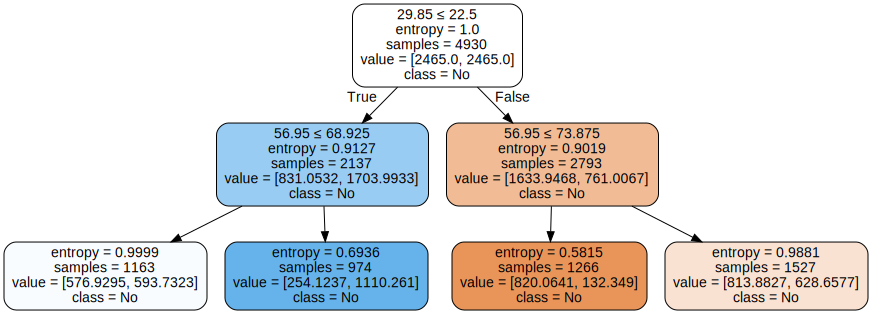

In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
x,y = Custstat.loc[:,Custstat.columns != 'Churn'], Custstat.loc[:,'Churn']


t = tree.DecisionTreeClassifier(max_depth = 2,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 1)
t.fit(x_train, y_train)

t.score(x_test, y_test) # what performance metric is this?

export_graphviz(t, out_file="mytree.dot",  
                         feature_names=Custstat.MonthlyCharges,  
                         class_names=Custstat.Churn,  
                         filled=True, rounded=True,  
                         special_characters=True)

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')